#### https://online.stat.psu.edu/stat510/lesson/8

In [1]:
import pandas as pd 
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#### The focus is the relationship between 2 time series

We talked about the cochrane-orcutt procedure. Now we focus on how to tell if there's an AR error.

The first step is to do a simple **OLS**. Check the residuals. Below are the ACF and PACF of the residuals. 

In [2]:
Image(url="AR1_error_example.png", width=600, height=600)

It looks like the errors have an AR(1) structure. Estimate the AR coefficients, check the diagnostics. We get the parameter 0.6488. Then we proceed to the Cochrane-Orcutt procedure.

In [3]:
#model = ARIMA(data, order=(1,0,0)).fit()

The most common way to model residuals is AR(1) and ARMA(1). When forecasting, we have an extra step to do $F_{t+1} = \hat{y}_{t+1} + \epsilon_{t+1}$

#### Cross Correlation Functions

In the relationship between 2 time series, the series $y_t$ may be related to past lags of the x-series. The sample cross correlation function (CCF) is helpful for identifying lags of x that might be useful predictors of $y_t$

When there's correlation between $x_{t+h}$ and $y_t$ with h negative, it means x **leads** y; with h positive, that being said x **lags** y

If we want to use values of the x-variable to predict future values of y, we want x to be a leading variable.

In [4]:
soi = pd.read_csv("soi.dat", header=None)
recruit = pd.read_csv("recruit.dat", header=None)

#### ccf

soi: a measure of weather -> x <br>
recruit: a measure of the fish population -> y <br>
The data are monthly estimates for n=453 months

In [32]:
tmp = pd.concat([soi, recruit], axis=1)
tmp.columns = ['x', 'y']

In [45]:
tmp['x_lag1'] = tmp['x'].shift(1)
tmp['x_lag2'] = tmp['x'].shift(2)
tmp['x_lag3'] = tmp['x'].shift(3)
tmp['x_lag4'] = tmp['x'].shift(4)
tmp['x_lag5'] = tmp['x'].shift(5)
tmp['x_lag6'] = tmp['x'].shift(6)
tmp['x_lag7'] = tmp['x'].shift(7)
tmp['x_lag8'] = tmp['x'].shift(8)
tmp['x_lag9'] = tmp['x'].shift(9)
tmp['x_lag10'] = tmp['x'].shift(10)

In [46]:
tmp.corr()

,x,y,x_lag1,x_lag2,x_lag3,x_lag4,x_lag5,x_lag6,x_lag7,x_lag8,x_lag9,x_lag10
x,1.000000,0.024954,0.604505,0.374388,0.214914,0.050472,-0.107737,-0.188370,-0.176517,-0.097409,0.049928,0.225159
y,0.024954,1.000000,0.010626,-0.041745,-0.146036,-0.298729,-0.529979,-0.602452,-0.602451,-0.564906,-0.480866,-0.373596
x_lag1,0.604505,0.010626,1.000000,0.604979,0.374953,0.215415,0.050465,-0.107767,-0.188508,-0.176730,-0.097452,0.050050
x_lag2,0.374388,-0.041745,0.604979,1.000000,0.608612,0.378986,0.216623,0.049243,-0.109602,-0.191000,-0.178512,-0.099761
x_lag3,0.214914,-0.146036,0.374953,0.608612,1.000000,0.607041,0.378260,0.219047,0.051867,-0.106817,-0.189187,-0.175929
x_lag4,0.050472,-0.298729,0.215415,0.378986,0.607041,1.000000,0.606977,0.381928,0.222985,0.056030,-0.104302,-0.185995
x_lag5,-0.107737,-0.529979,0.050465,0.216623,0.378260,0.606977,1.000000,0.608387,0.383524,0.224775,0.057104,-0.103095
x_lag6,-0.188370,-0.602452,-0.107767,0.049243,0.219047,0.381928,0.608387,1.000000,0.607839,0.382467,0.223735,0.055362
x_lag7,-0.176517,-0.602451,-0.188508,-0.109602,0.051867,0.222985,0.383524,0.607839,1.000000,0.606947,0.381404,0.221894
x_lag8,-0.097409,-0.564906,-0.176730,-0.191000,-0.106817,0.056030,0.224775,0.382467,0.606947,1.000000,0.606165,0.379558


In [47]:
pd.Series(sm.tsa.stattools.ccf(x=tmp['y'], y=tmp['x'], adjusted=False)[:20])

0     0.024954
1     0.010625
2    -0.041708
3    -0.145666
4    -0.297175
5    -0.527014
6    -0.598702
7    -0.598123
8    -0.559870
9    -0.476060
10   -0.369246
11   -0.267005
12   -0.175449
13   -0.102648
14   -0.075952
15   -0.092425
16   -0.149012
17   -0.222254
18   -0.252903
19   -0.198068
dtype: float64

The most dominant cross correlations occur somewhere between h=-10 and h=-4. 

Specifically, we can plot y vs x lags 5,6,7,8

#### scatter plot

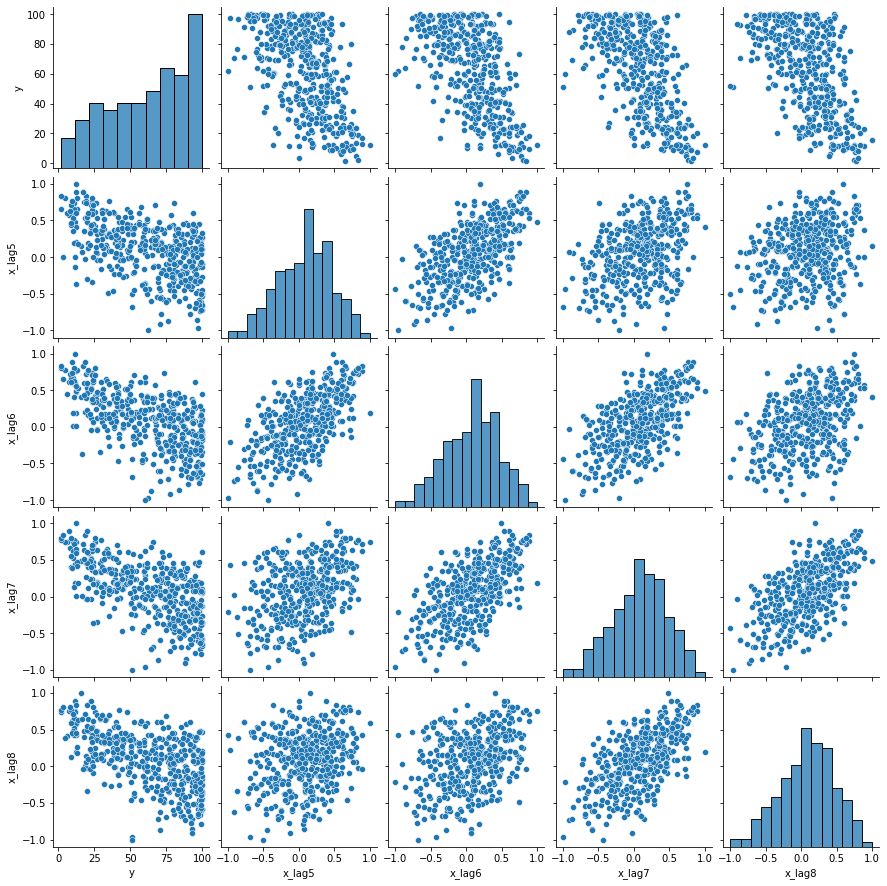

In [52]:
sns.pairplot(tmp[['y', 'x_lag5', 'x_lag6', 'x_lag7', 'x_lag8']])

#### regression models: we can regress y vs. lagged x; at the same time, we can add lagged y as well